<a href="https://colab.research.google.com/github/yogeshlakwal3114/SpamTracker/blob/main/SpamTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Classification
In this project, we utilized text classification techniques to determine whether a message is spam or not. We applied various NLP methods to prepare and clean the text data, including tokenization, stop word removal, and stemming. To achieve more accurate predictions, we experimented with different machine learning algorithms. The classification models used included Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest, Stochastic Gradient Descent, and Gradient Boosting.

# Loading libaries and data

In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('spam.csv',  encoding='latin-1')

In [41]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2983,ham,He said that he had a right giggle when he saw...,NaN,NaN,NaN
5003,ham,There's someone here that has a year &lt;#&gt...,NaN,NaN,NaN
5507,ham,I want to be inside you every night...,NaN,NaN,NaN
5418,ham,So how are you really. What are you up to. How...,NaN,NaN,NaN
3186,ham,Howz that persons story,NaN,NaN,NaN


In [42]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprocessing
4. Modal Building
5. Evaluation
6. Improvment

# DATA CLEANING
Remove unnecessary variables:

In [43]:
 # Check the last 3 column is important is or not
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
# drop last 3 column
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [45]:
df.sample(5)

,v1,v2
3413,ham,No pic. Please re-send.
5298,ham,I.ll hand her my phone to chat wit u
1545,ham,"Good afternoon, my love ! Any job prospects ? ..."
4791,ham,Gd luck 4 ur exams :-)
109,ham,Dont worry. I guess he's busy.


In [46]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
1282,ham,Ever green quote ever told by Jerry in cartoon...
2352,ham,Thats cool. How was your day?
2870,ham,I actually did for the first time in a while. ...
1809,ham,"Aight, I'll ask a few of my roommates"
1211,ham,Ok then i will come to ur home after half an hour


In [47]:
# import nessary library for label ham to 0 and spam to 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
df['target'] = encoder.fit_transform(df['target'])

In [49]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# checking missing values
df.isnull().sum()

,0
target,0
text,0


In [51]:
# check for duplicate values
df.duplicated().sum()

403

In [52]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [53]:
df.duplicated().sum()

0

In [54]:
df.shape

(5169, 2)

# EDA

In [55]:
# Find the count of ham and Spam
df['target'].value_counts()

,count
target,
0,4516
1,653


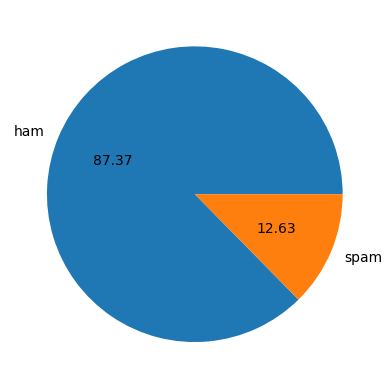

In [56]:
# make pic chart to show ham and spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [57]:
# Data is imbalanced

In [58]:
# Now We will Find the number of character, word and sentences are using in each ham and spam

In [59]:
import nltk

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# number of Characters
df['num_characters'] = df['text'].apply(len)

In [62]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [64]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [65]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
# describe all num_characters, num_words and num_sentences
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [68]:
# check describe for ham messages
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
# check describe for spam messages
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


After analyze the describe for both ham and spam messages. We found that the spam message contain more mean character, word and sentence compare to ham message.

<Axes: xlabel='num_characters', ylabel='Count'>

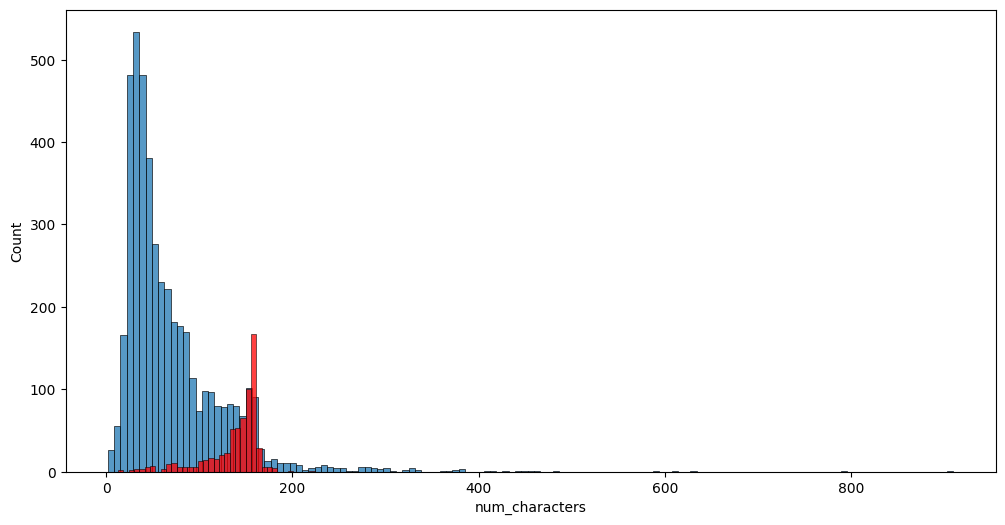

In [70]:
# plot Histogram for ham (num_characters)
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])

# plot Histogram for spam
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

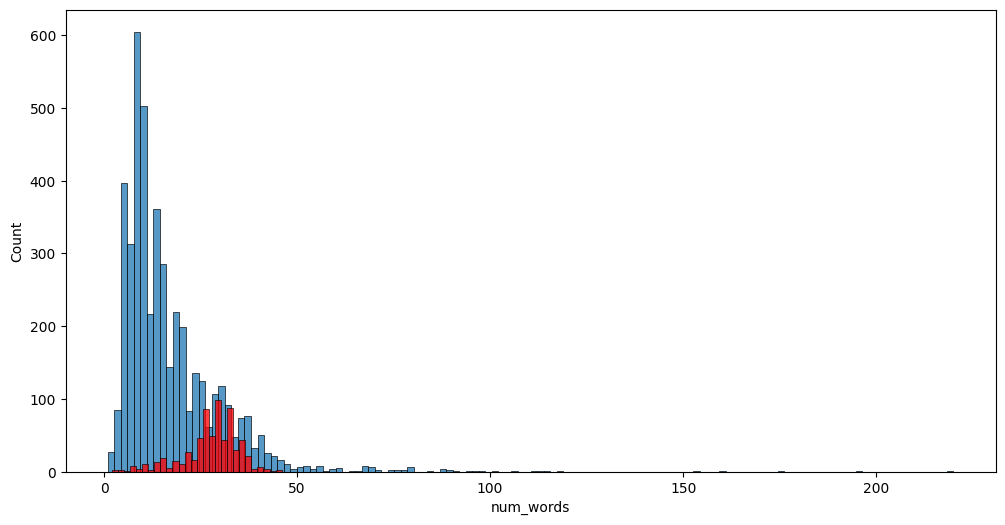

In [71]:
# plot Histogram for ham (num_words)
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])

# plot Histogram for spam
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

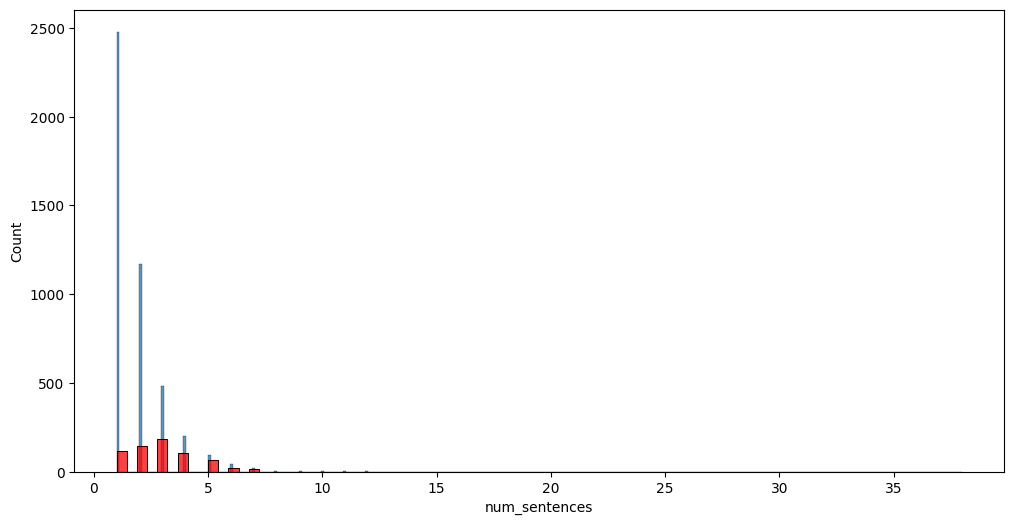

In [72]:
# plot Histogram for ham (num_sentences)
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])

# plot Histogram for spam
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

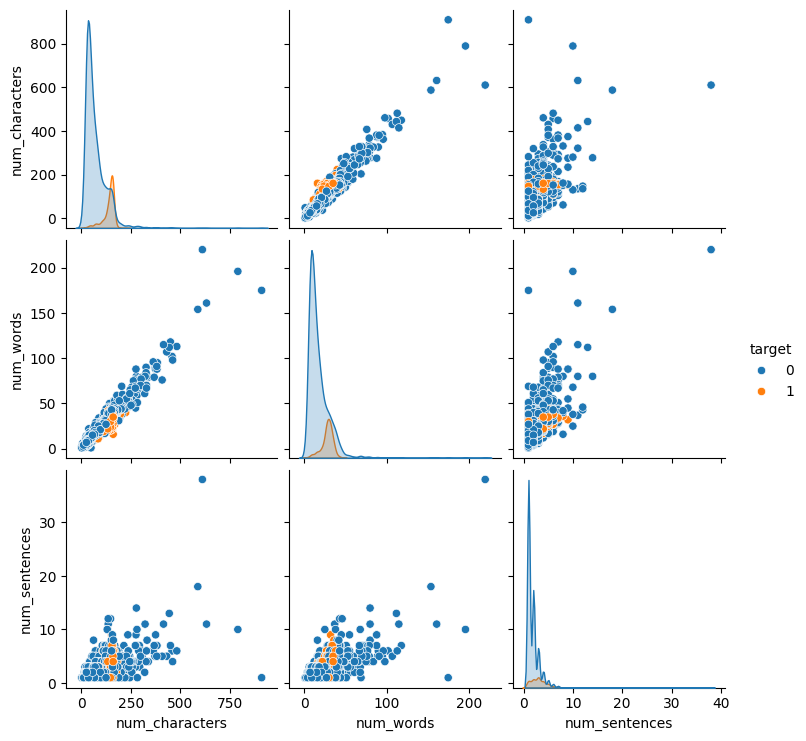

In [73]:
# Correlation between them using pairplot
sns.pairplot(df, hue='target')

## 3. Data Preprocessing
1. Lower case
2. Tokenization (break into words)
3. Removing special characters
4. Removing stop words and punctuation (stop words mean sentence forming words like is,of,the etc. and punctuation like %,$ etc.)
5. Stemming (convert the same type of words like dance, dancing and danced -> dance)


In [74]:
# Create Function for Data Preprocessing
def transform_text(text):
    #lower case
    text = text.lower()

    # Tokenizatio
    text = nltk.word_tokenize(text)

    # Remove Special characters using array
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Remove Stop words and Punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # for stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

import stopwords
1. -> from nltk.corpus import stopwords
2. -> nltk.download('stopwords')
3. -> stopwords.words('english')

stopwords : Words those don't have any contribution in sentence meaning only contribution in sentence forming

for punctuation marks import string
1. -> import string
2. -> string.punctuation

for stemming
1. -> from nltk.stem.porter import PorterStemmer
2. -> ps = PorterStemmer()
3. -> ps.stem('dancing')

In [83]:
transform_text('I loved the YT lectures on Machine Learning')

'love yt lectur machin learn'

In [84]:
# Transfrom all text
df['transformed_text'] = df['text'].apply(transform_text)

In [85]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
# Making Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [87]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

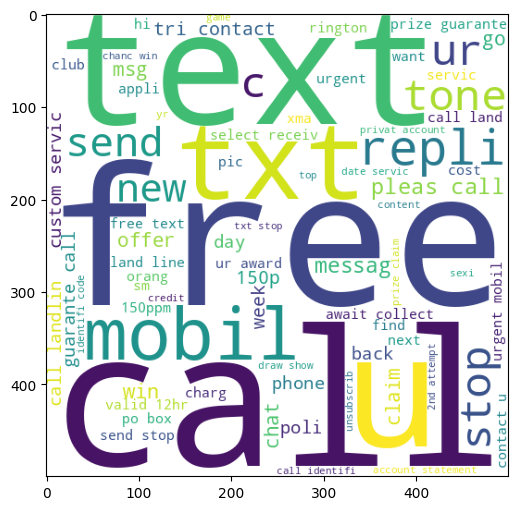

In [88]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [89]:
# for ham
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

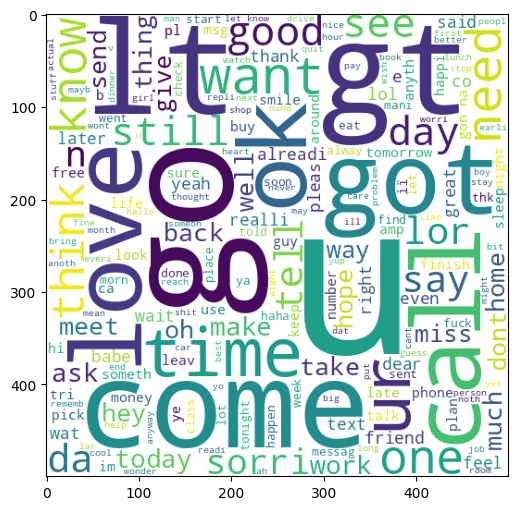

In [90]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [91]:
# Find Top 30 mostly used words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for Word in msg.split():
    spam_corpus.append(Word)

In [92]:
len(spam_corpus)

9939

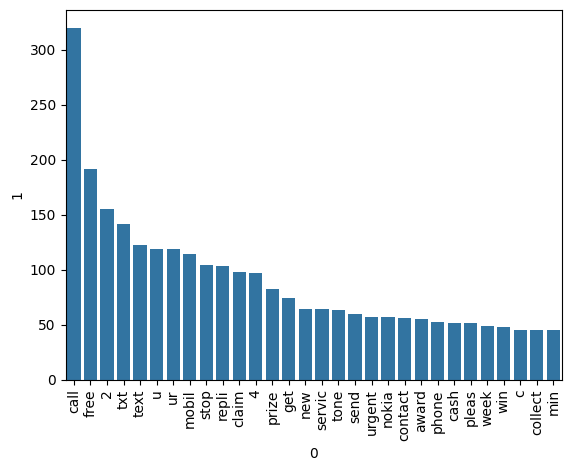

In [93]:
# import counter to find most used 30 word
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [94]:
# for ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for Word in msg.split():
    ham_corpus.append(Word)

In [95]:
len(ham_corpus)

35404

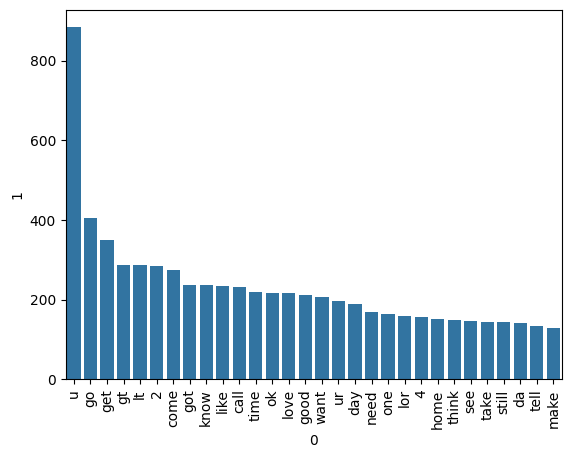

In [96]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building
We use the following classification models:

1. Logistic Regression,
2. Naive Bayes Classifier,
3. Random Forest Classifier,
4. Gradient Boosting,
5. SVM (Support Vector Machine),
6. Stochastic Gradient Descent.

In [97]:
# text to vector convert(vectorize)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [270]:
# x = cv.fit_transform(df['transformed_text']).toarray()

# Using TfIdf
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [211]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [212]:
# appending the num_character col to X
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [213]:
x.shape

(5169, 3000)

In [214]:
y = df['target'].values

In [215]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [216]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [218]:
# importing naive bayes algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [219]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Precision score should be matter first then Accuracy

In [220]:
# GaussianNB precision_score checking
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [221]:
# MultinomialNB precision_score checking
mnb.fit(x_train, y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [222]:
# BernoulliNB precision_score checking
bnb.fit(x_train, y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [223]:
# Precision score ke hisab se MultinomialNB better hai

# Others model creating and checking the precision Score

In [224]:
# tfidf --> MNB

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [226]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [227]:
# Dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [229]:
# Example
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [230]:
# Find Precision Score of all Dictionary using loop
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    # print("For ",name)
    # print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [231]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [232]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [233]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [234]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


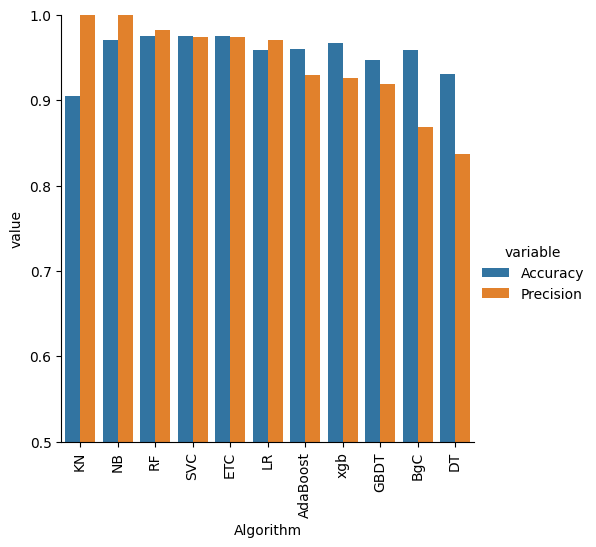

In [235]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Modal Improving

In [236]:
# 1. Change the max_features parameter of TfIdf

In [237]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [238]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [239]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [240]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [241]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [242]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [243]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [244]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [246]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [247]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [248]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [249]:
from sklearn.ensemble import StackingClassifier

In [250]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [251]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


# Example Checking
For check the text is spam or not


In [252]:
import pickle
from google.colab import files

In [303]:
# Split the data into training and testing sets
X_train, _, y_train, _ = train_test_split(df['text'], df['target'], test_size=0.25, random_state=42)

# Initialize and fit the TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Initialize and fit the MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [304]:
print(f"Model classes: {mnb.classes_}")

Model classes: [0 1]


In [305]:
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


In [306]:
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf = pickle.load(vectorizer_file)

# Load the model
with open('model.pkl', 'rb') as model_file:
    mnb = pickle.load(model_file)

# Check if the model is correctly loaded and fitted
if hasattr(mnb, 'classes_'):
    print("Model loaded and is fitted correctly.")
else:
    print("Model is not loaded correctly or is not fitted.")

Model loaded and is fitted correctly.


In [307]:
# Verify if model is fitted
try:
    assert hasattr(mnb, 'predict')
    assert hasattr(mnb, 'classes_')  # Check if the model has been fitted
    print("Model loaded successfully and is fitted.")
except AssertionError:
    print("Model is not loaded correctly or is not fitted.")

Model loaded successfully and is fitted.


In [308]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [309]:
def predict_spam(text):
    try:
      # Transform the input text
      transformed_sms = transform_text(text)

      # Vectorize the text using the loaded TF-IDF vectorizer
      vector_input = tfidf.transform([transformed_sms])

      # Predict using the loaded model
      result = model.predict(vector_input)[0]

      # Return the result
      return "Spam" if result == 1 else "Not Spam"

    except Exception as e:
        print(f"An error occurred: {e}")

In [310]:
# take example
text_input = "Hi, just wanted to check in and see how you're doing. Let me know if you need anything!"
prediction = predict_spam(text_input)

In [311]:
from IPython.display import display, HTML

In [312]:
if prediction == "Spam":
    display(HTML(f"<div style='font-size:30px; color:red; font-weight:bold;'>{prediction}</div>"))
else:
    display(HTML(f"<div style='font-size:30px; color:green; font-weight:bold;'>{prediction}</div>"))